# Program Developer: Shahid N. Jamadar

# Importing Libraries after nicely installing themn
Note: Install libraries before use otherwise system will throws errors

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram , linkage

# Data gathering from the Kaggle DataSet website or downloaded file in the code section

In [6]:
Data = pd.read_csv("C:\\Users\\adi63\\Documents\\shahid\\imdb_top_1000.csv")
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


In [7]:
# checking null values and remove it
print("\n Missing values : ")
print(Data.isna().sum())
Data.dropna(axis =0 , inplace=True)
print(Data.isna().sum())


 Missing values : 
Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64
Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


# Data Visualization using Graphs and Plots

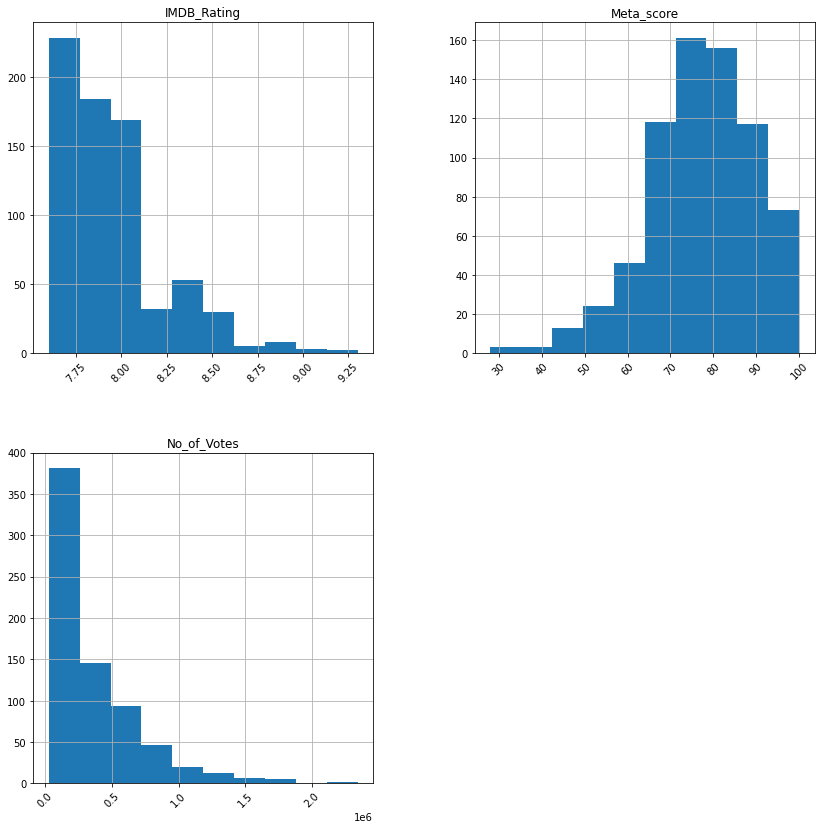

In [8]:
Data.hist(figsize=(14,14), xrot=45)
plt.show()

Here I found maximum number of Movies rank is 7.7.

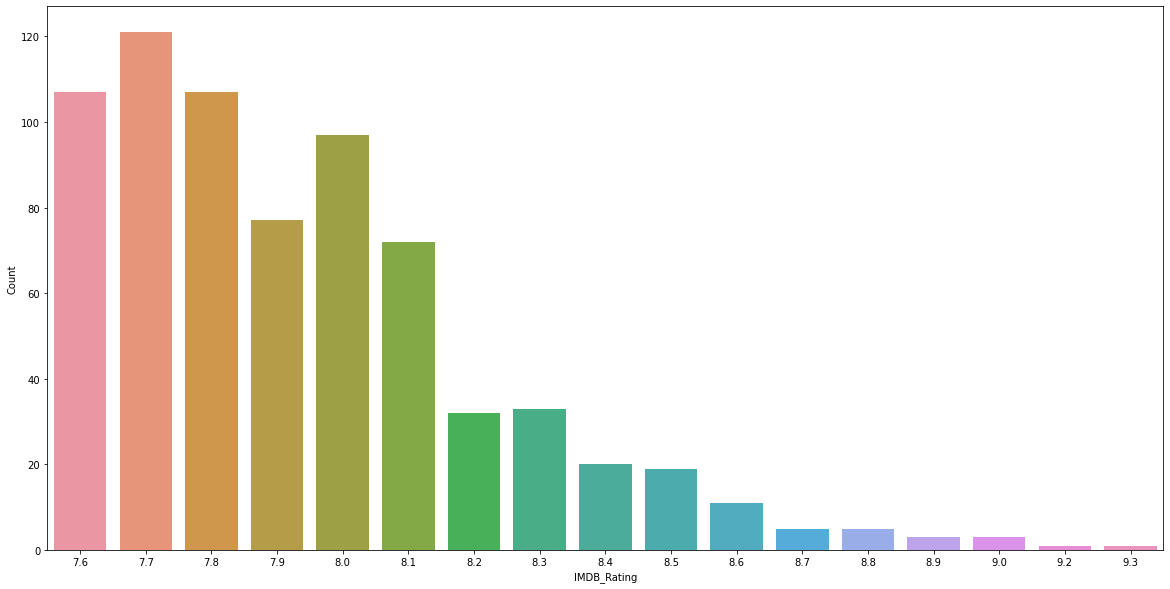

In [9]:
plt.figure(figsize=(20,10))
sns.countplot(x='IMDB_Rating', data = Data)

plt.xlabel('IMDB_Rating')

plt.ylabel('Count')
  
plt.show()

I take  1st 10 rows of the data as a sample. 
I found that maximum score that Movies reached is 76.0 .

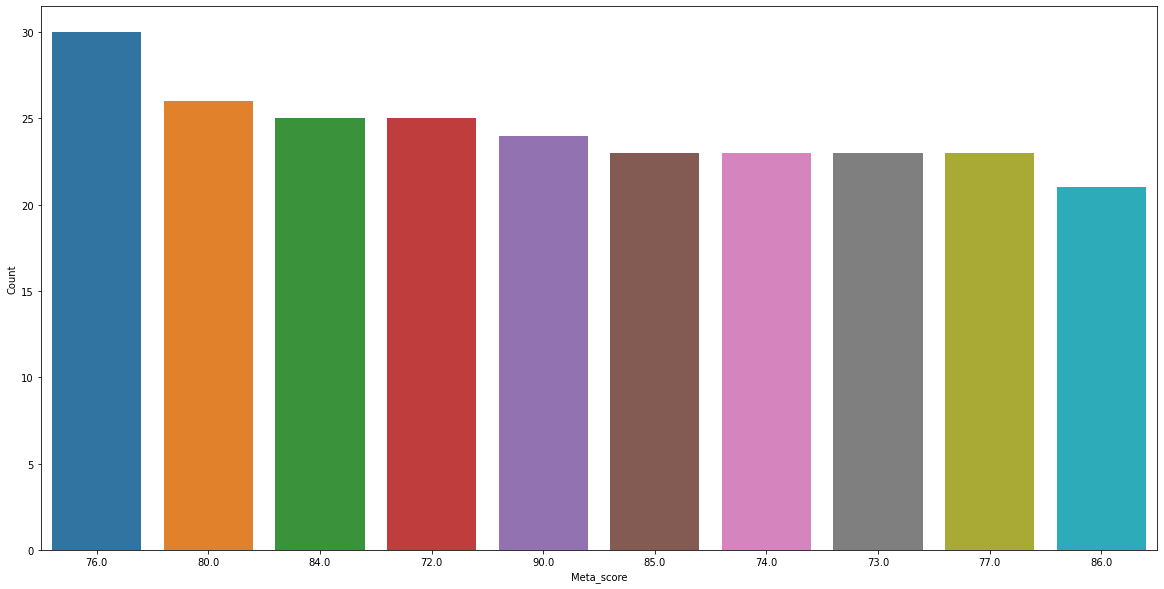

In [10]:
plt.figure(figsize=(20,10))
sns.countplot(x='Meta_score', data = Data, order=Data['Meta_score'].value_counts().index[0:10])

plt.xlabel('Meta_score')

plt.ylabel('Count')
  
plt.show()

I take a look on first 10 rows of the data as a sample. 
I found that maximum  number of mvoies were produced in 2014th year. 

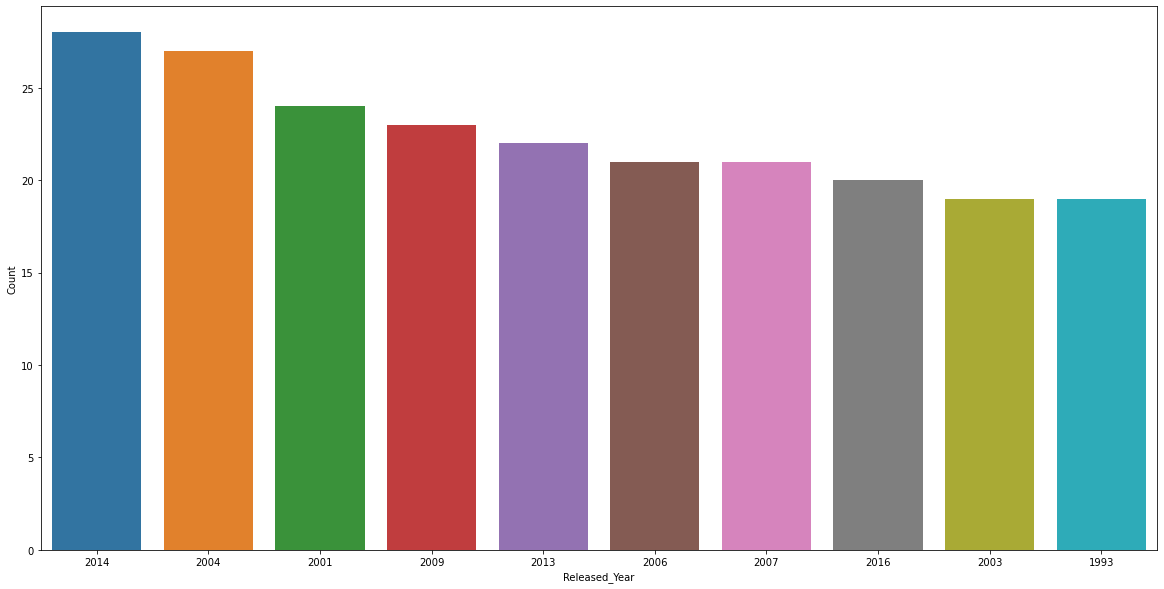

In [11]:
plt.figure(figsize=(20,10))
sns.countplot(x='Released_Year', data = Data, order=Data['Released_Year'].value_counts().index[0:10])

plt.xlabel('Released_Year')

plt.ylabel('Count')
  
plt.show()

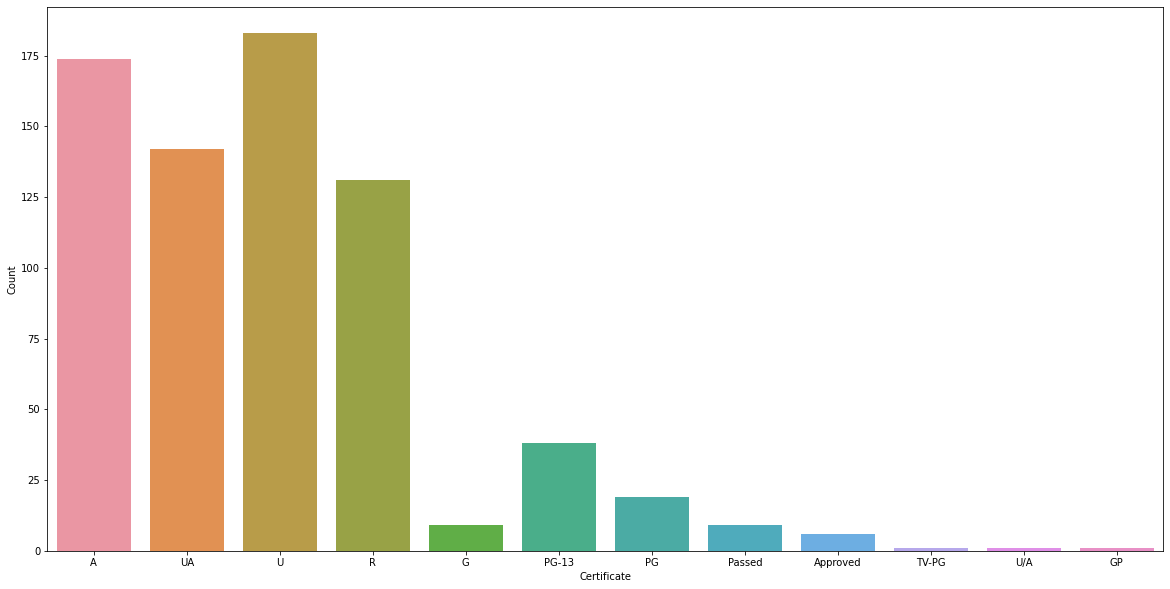

In [12]:
plt.figure(figsize=(20,10))
sns.countplot(x='Certificate', data = Data)

plt.xlabel('Certificate')

plt.ylabel('Count')
  
plt.show()

I take look on first 10 rows of the data as a sample. 
I found that the most of people catageroy watching is Drama.

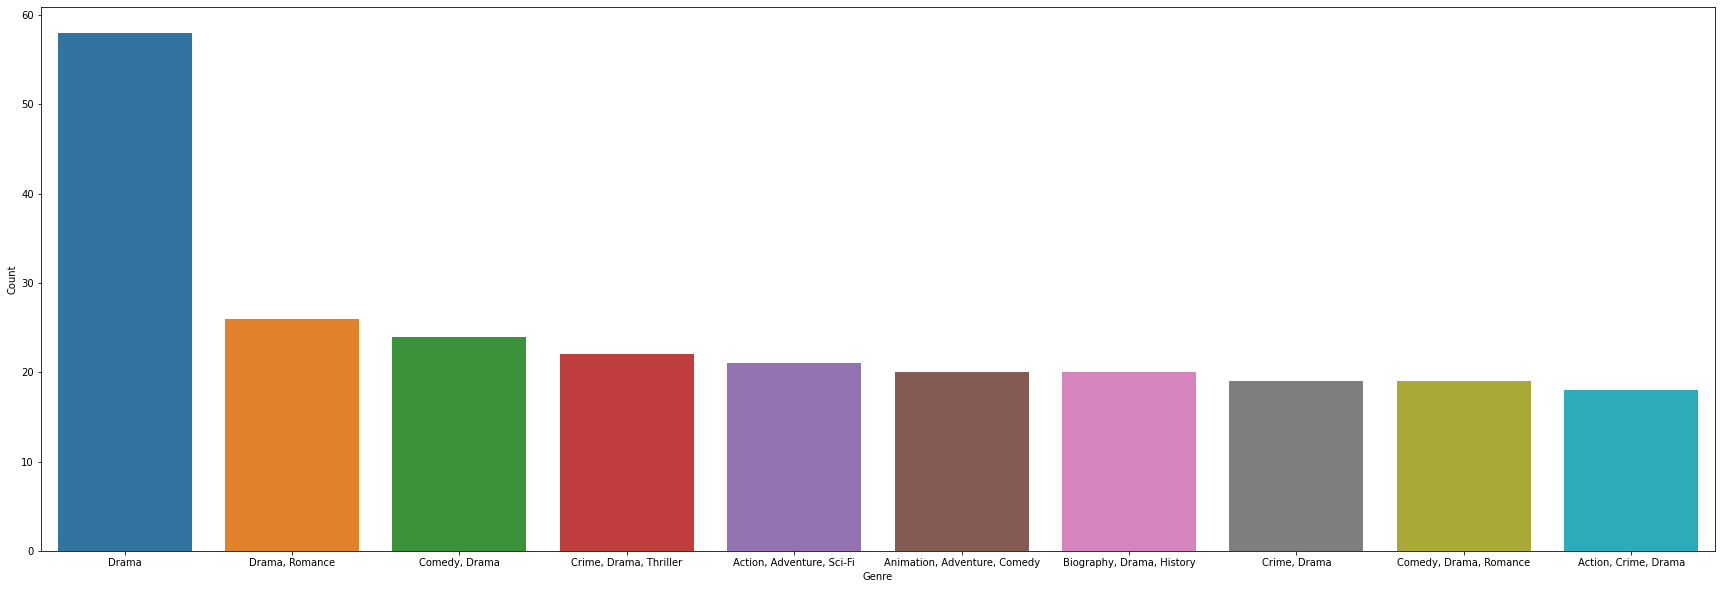

In [13]:
plt.figure(figsize=(30,10))
sns.countplot(x='Genre', data = Data, order=Data['Genre'].value_counts().index[0:10])

plt.xlabel('Genre')

plt.ylabel('Count')
  
plt.show()


I take look on first 10 rows of the data as a sample. I founded that the most number character as Star1 is " Tom Hanks " in different 12 Movies.

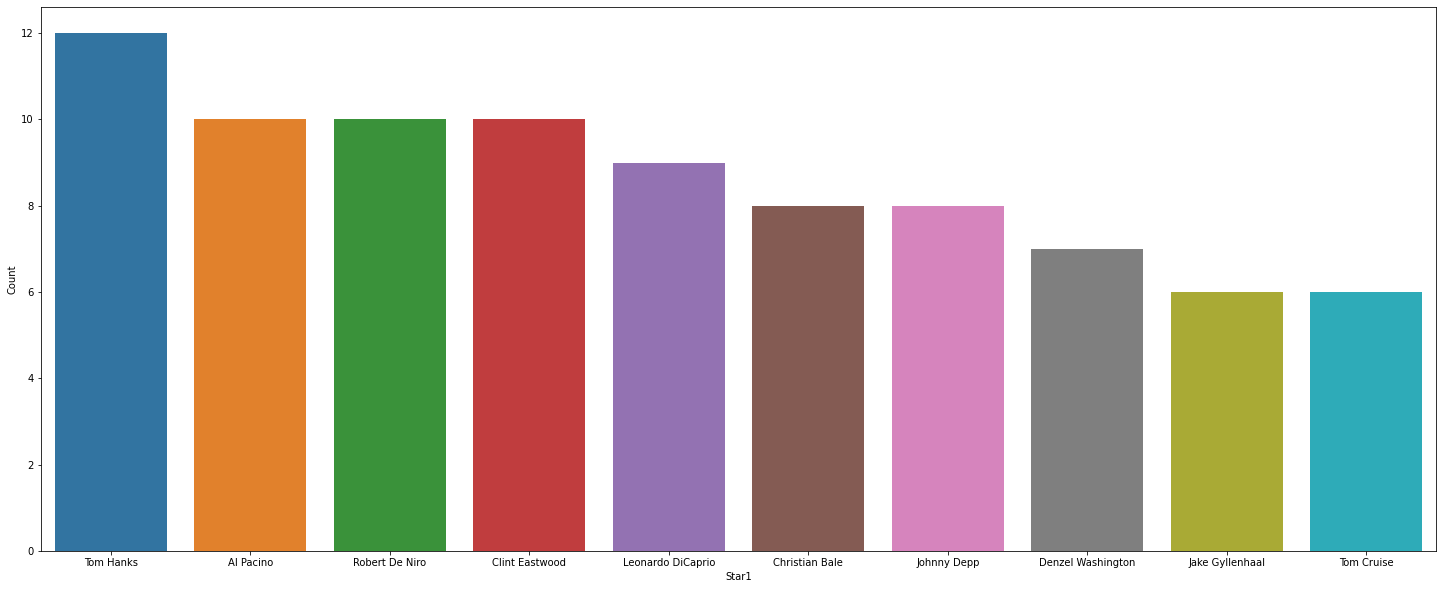

In [14]:
plt.figure(figsize=(25,10))
sns.countplot(x='Star1', data = Data, order=Data['Star1'].value_counts().index[:10])

plt.xlabel('Star1')

plt.ylabel('Count')
  
plt.show()

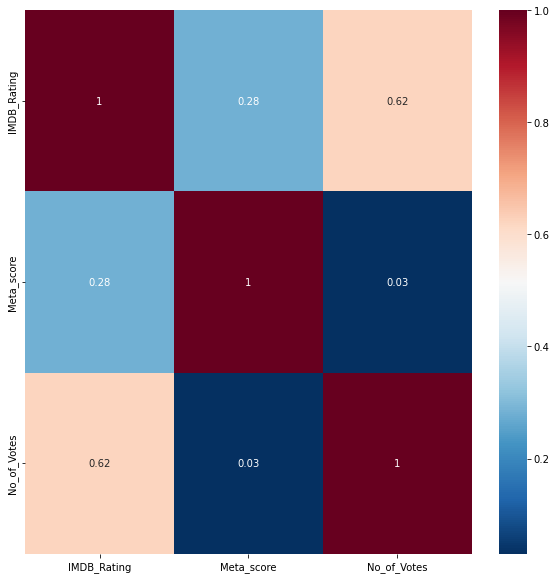

In [15]:
plt.figure(figsize=(10,10))
sns.heatmap(Data.corr(), cmap='RdBu_r', annot=True)
plt.show()

I take look on first 10% of the data as a sample between 
Genre and released date. 
I found that the rate watching is in 2015 all over the current 6 years

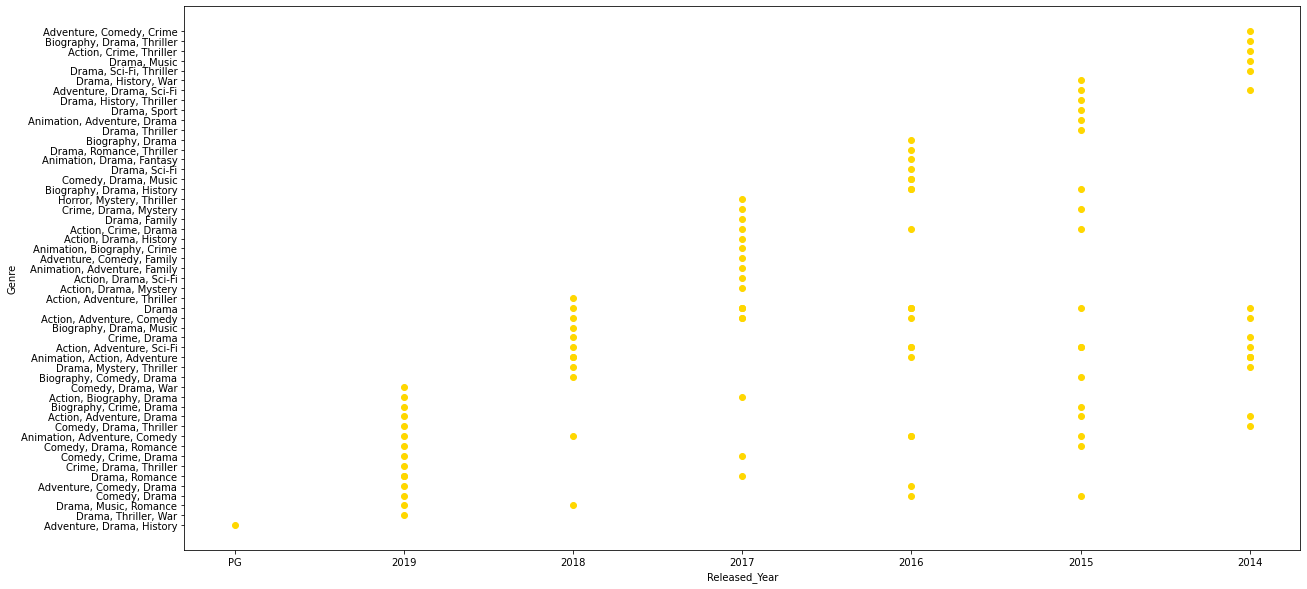

In [16]:
plt.figure(figsize=(20,10))
X = Data.sort_values('Released_Year',ascending=False).head(100)
plt.scatter(X['Released_Year'], X['Genre'].head(100),color='gold')
plt.xlabel("Released_Year")
plt.ylabel("Genre")
plt.show()

I take look on first 10% of the data as a sample between 
IMDB_Rating and released date. 
I found that the rate is 9.2 is the least rate that took all over the last 75 years and the most rate is arround 8.4 & 8.6

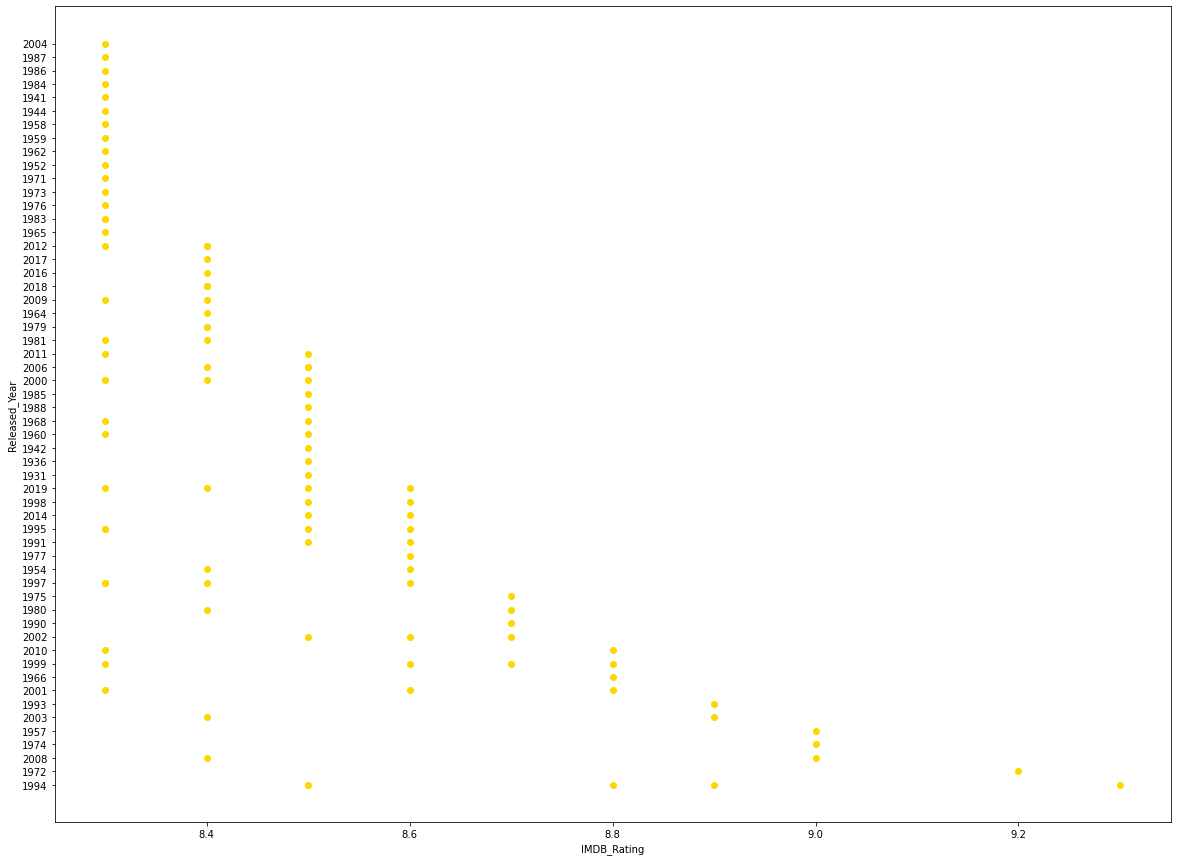

In [17]:
plt.figure(figsize = (20,15))
X = Data.sort_values('IMDB_Rating',ascending=False).head(100)
plt.scatter(X['IMDB_Rating'].head(100), X['Released_Year'].head(100),color='gold')
plt.xlabel("IMDB_Rating")
plt.ylabel("Released_Year")
plt.show()

According to the correlation matrix "Certificate" affect in "IMDB_Rating" Although "Meta score" count decrease when "IMDB_Rating' Increased As these Movies get the highest score 

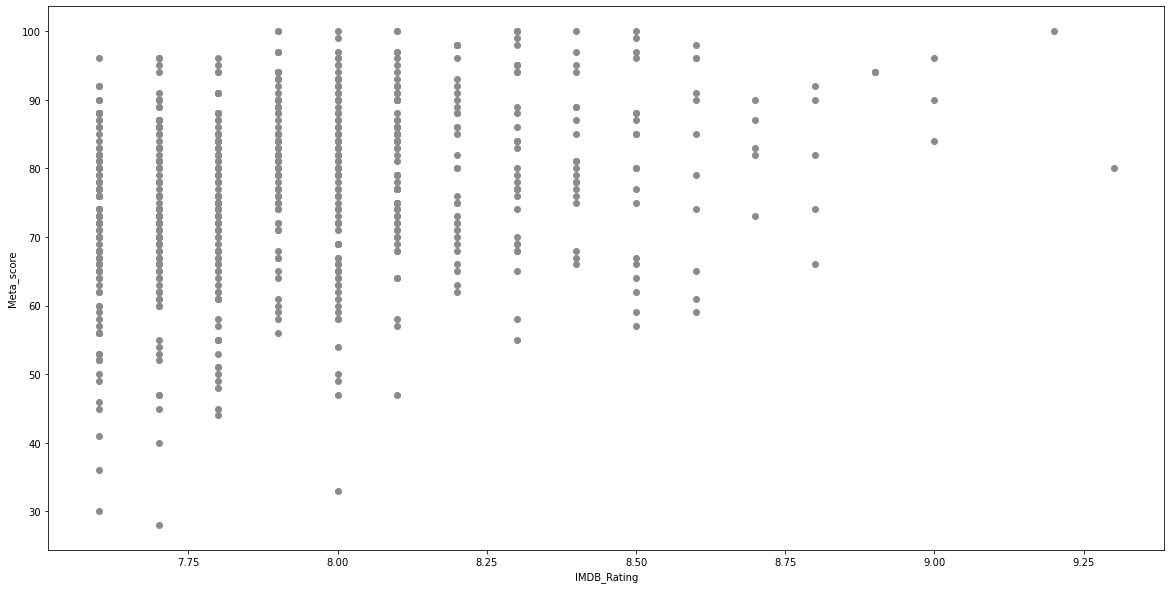

In [18]:
plt.figure(figsize=(20,10))
plt.scatter( Data['IMDB_Rating'] ,Data['Meta_score'],color='#8b8b8b')
plt.xlabel("IMDB_Rating")
plt.ylabel("Meta_score")
plt.show()

I take look of first 50 rows and sorted them into an ascending so I found that " Edge of Tomorrow " series has the most gross till date. 

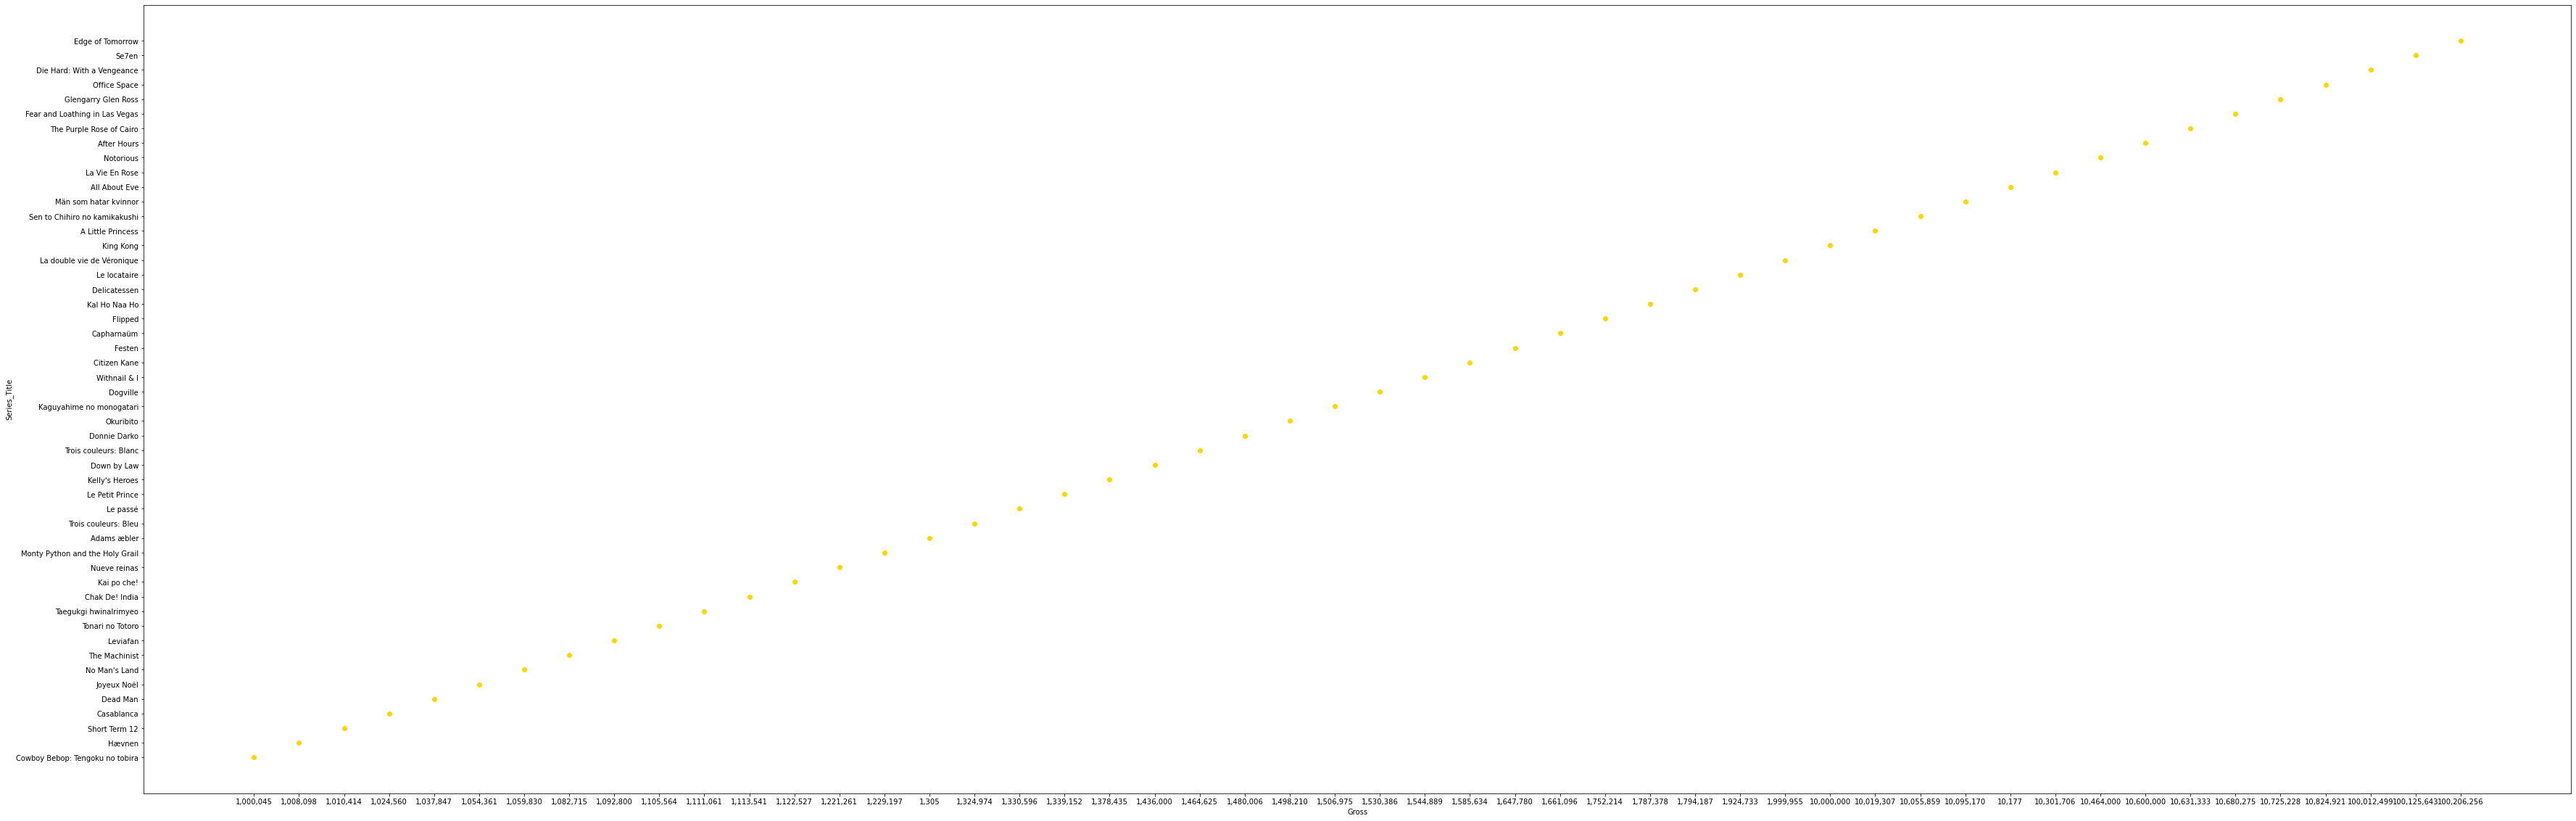

In [19]:
plt.figure(figsize = (60,20))
X = Data.sort_values('Gross',ascending=True).head(50)
plt.scatter( X['Gross'].head(50),X['Series_Title'].head(50),color='gold')
plt.xlabel("Gross")
plt.ylabel("Series_Title")
plt.show()

If we take 10% of the data and sort tem by the rating we find that most of series take  rate arrounding 7.6 & 8.6 

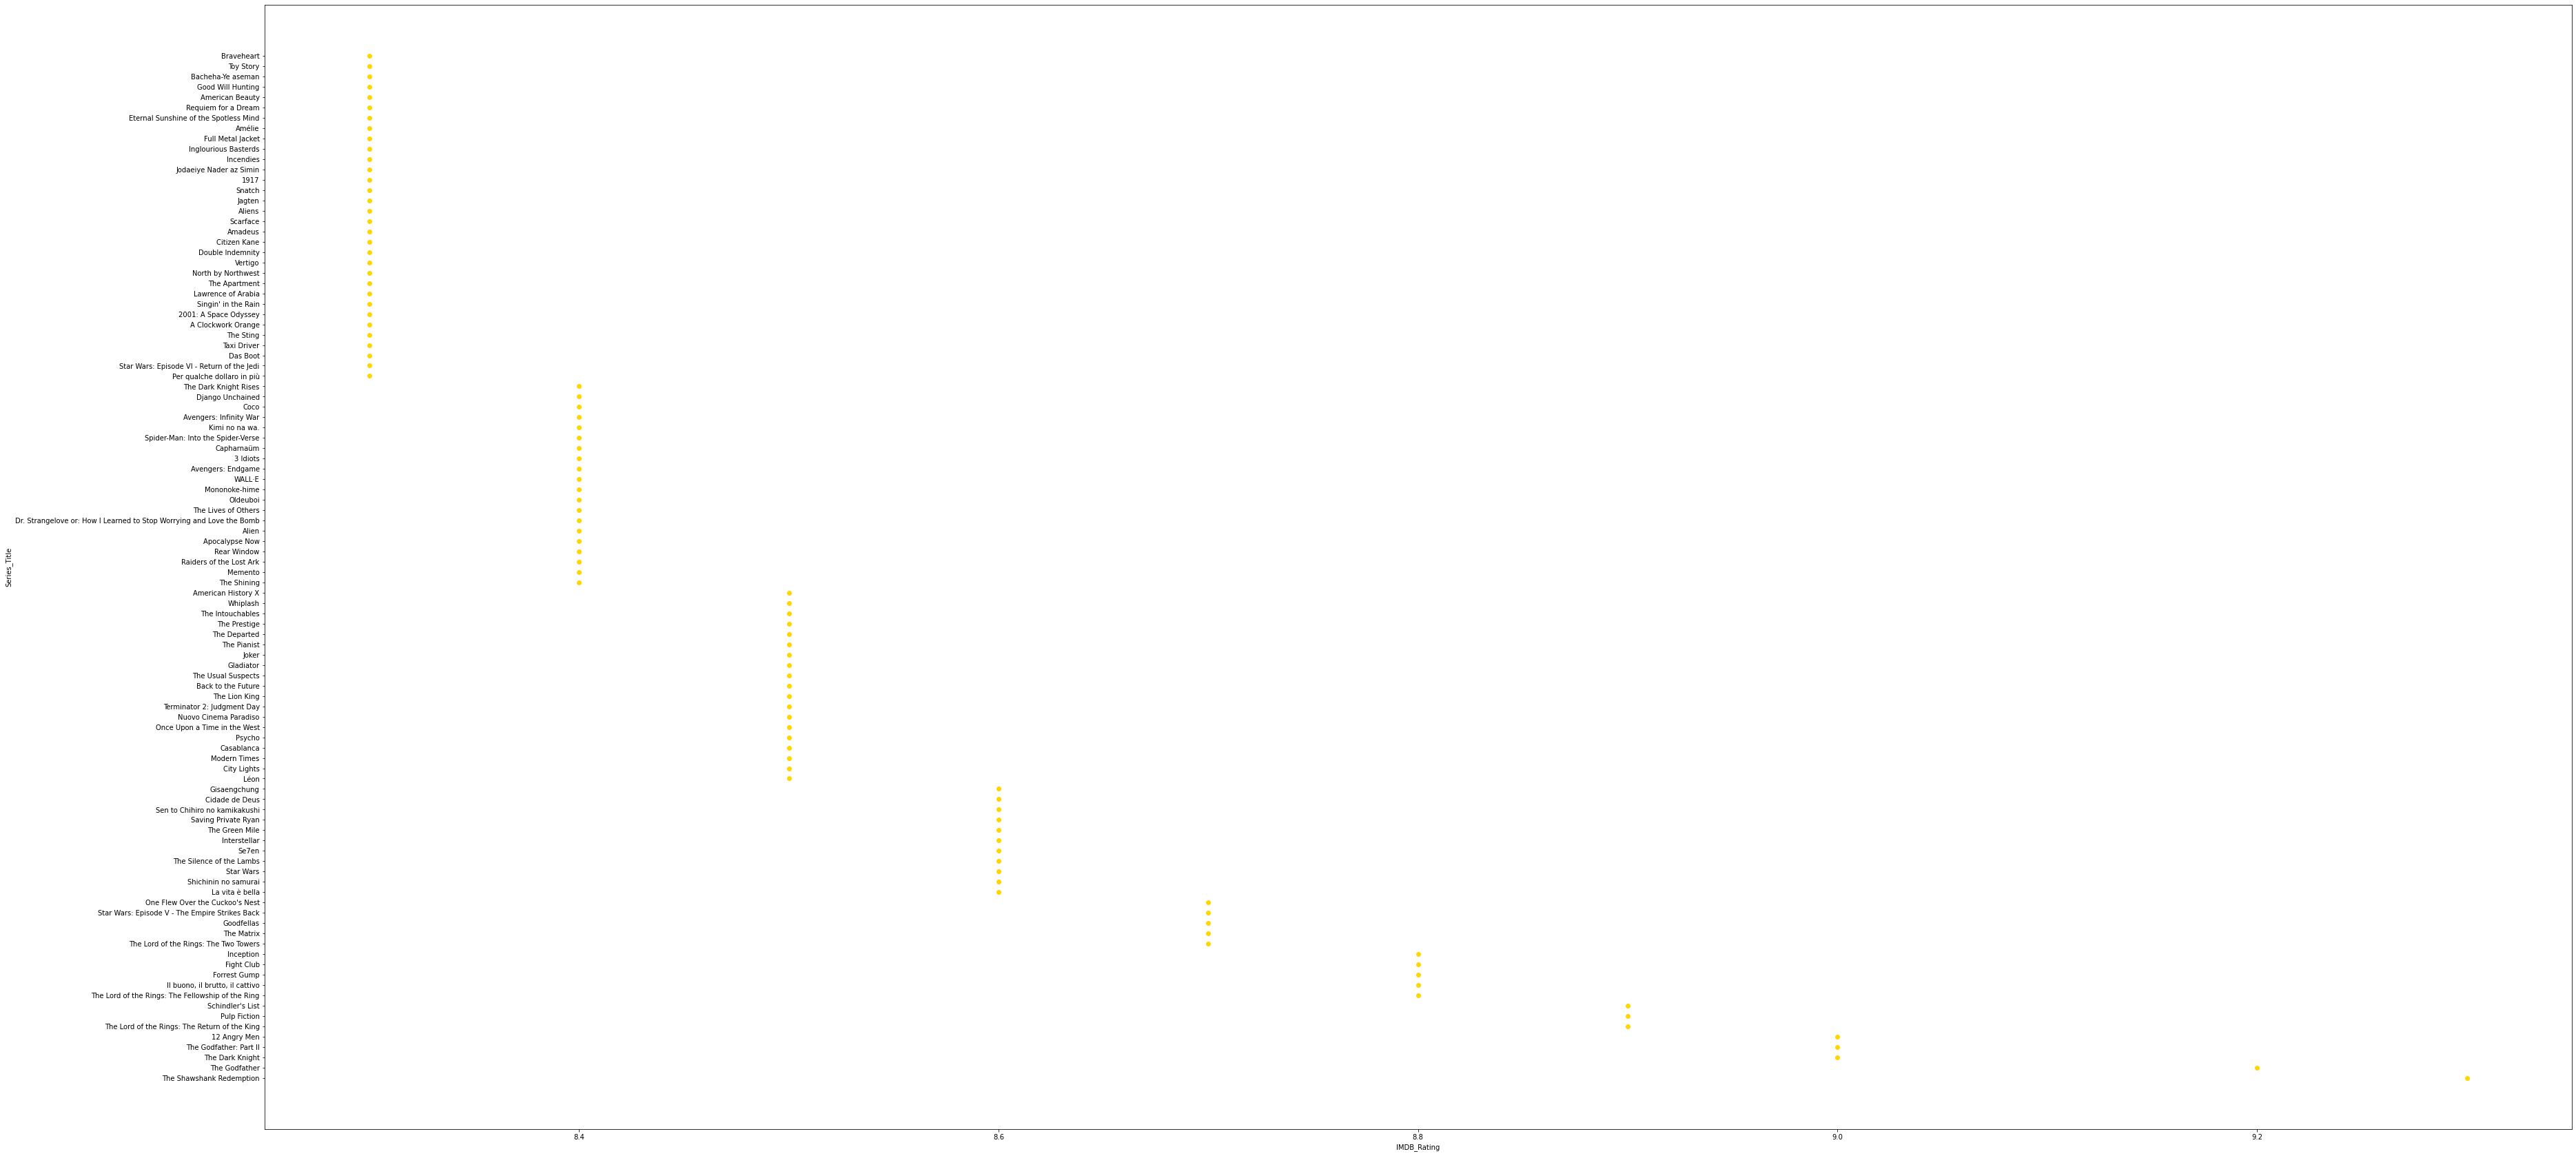

In [20]:
plt.figure(figsize = (60,30))
X = Data.sort_values('IMDB_Rating',ascending=False).head(100)
plt.scatter(X['IMDB_Rating'].head(100), X['Series_Title'].head(100),color='gold')
plt.xlabel("IMDB_Rating")
plt.ylabel("Series_Title")
plt.show()

# Preprocessing & Modeling of the Data

# Preprocessing of Data

In [21]:
print(Data.corr())
data = Data.drop(columns ="Poster_Link", inplace = False)
data.drop(columns ="Overview", inplace = False)
data.drop(columns ="Director", inplace = True)
data.drop(columns = "Star2", inplace = True)
data.drop(columns ="Star3", inplace = True)
data.drop(columns ="Star4", inplace = True)

print(data)

             IMDB_Rating  Meta_score  No_of_Votes
IMDB_Rating     1.000000    0.280894     0.623142
Meta_score      0.280894    1.000000     0.029744
No_of_Votes     0.623142    0.029744     1.000000
                 Series_Title Released_Year Certificate  Runtime  \
0    The Shawshank Redemption          1994           A  142 min   
1               The Godfather          1972           A  175 min   
2             The Dark Knight          2008          UA  152 min   
3      The Godfather: Part II          1974           A  202 min   
4                12 Angry Men          1957           U   96 min   
..                        ...           ...         ...      ...   
990              Giù la testa          1971          PG  157 min   
991            Kelly's Heroes          1970          GP  144 min   
992           The Jungle Book          1967           U   78 min   
994        A Hard Day's Night          1964           U   87 min   
997     From Here to Eternity          1953      Pas

In [22]:
labelEncoder = LabelEncoder()
for items in data.columns:
   labelEncoder.fit(data[items])
   data[items] = labelEncoder.transform(data[items])

# Modeling can be done by using various methods

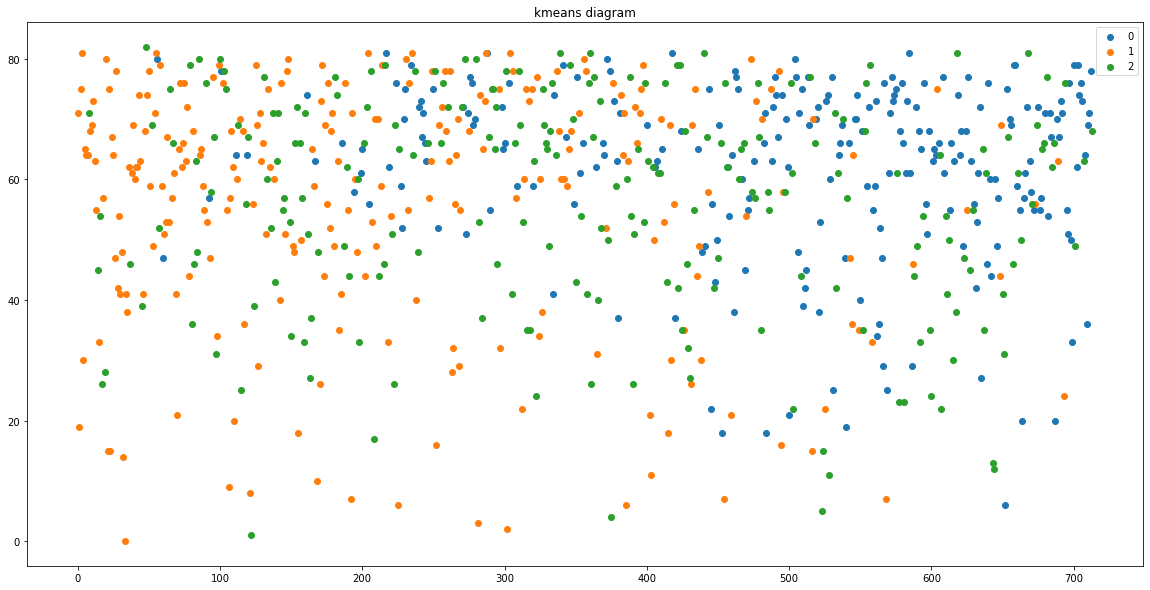

In [23]:
# Modeling by Kmeans with 2 clusters
kmeans = KMeans(n_clusters=3).fit_predict(data[:])
data = np.array(data)
labels = np.unique(kmeans)
plt.figure(figsize=(20,10))
for i in labels: #iterates to filter the data according to each unique class one iteration at a time 
#(filters and keeps the data points that belong to clutser label i)
    plt.scatter(data[kmeans == i,0],data[kmeans == i,1],label = i)
plt.title("kmeans diagram")
plt.legend()
plt.show()

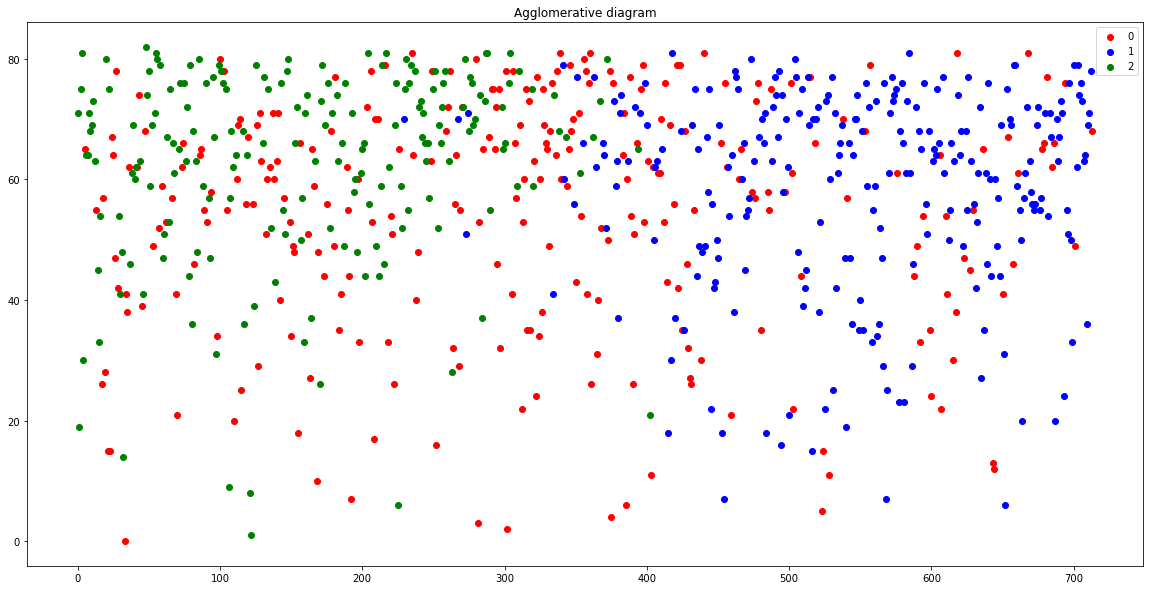

In [24]:
# Modeling using Agglomerative clustring
agg_clustering = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
#predicting the labels 
labels = agg_clustering.fit_predict(data)
#Plotting the results
plt.figure(figsize=(20,10))
plt.scatter(data[labels == 0 , 0] , data[labels == 0 , 1] , c = 'red')
plt.scatter(data[labels == 1 , 0] , data[labels == 1 , 1] , c = 'blue')
plt.scatter(data[labels == 2 , 0] , data[labels == 2 , 1] , c = 'green')
plt.title("Agglomerative diagram")
plt.legend(["0","1","2"])
plt.show()
